## Import data

In [ ]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Download latest version
path = kagglehub.dataset_download("raghadalharbi/all-products-available-on-sephora-website")
files = os.listdir(path)
print("Path to dataset files:", path)
print("Files in dataset directory:", files)


100%|██████████| 4.64M/4.64M [00:00<00:00, 6.75MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/raghadalharbi/all-products-available-on-sephora-website/versions/1
Files in dataset directory: ['sephora_website_dataset.csv']


In [ ]:
csv_file_path = os.path.join(path, "sephora_website_dataset.csv")
data = pd.read_csv(csv_file_path)

## Data Exploration

***Column Descriptions***
- **id**: Unique identifier for each product.
- **brand**: Brand name of the product.
- **category**: Product category, e.g., skincare, fragrance.
- **name**: Name of the product.
- **size**: Product size information.
- **rating**: Customer rating of the product (scale 0–5).
- **number_of_reviews**: Number of customer reviews.
- **love**: "Love" metric, indicating user engagement.
- **price**: Product price in USD.
- **value_price**: Listed value price, if different from sale price.
- **MarketingFlags**: Boolean flag for marketing purposes.
- **MarketingFlags_content**: Additional marketing information.
- **options**: Available product options, such as colors or sizes.
- **details**: Detailed product description.
- **how_to_use**: Instructions for using the product.
- **ingredients**: List of ingredients for applicable products.
- **online_only**: Indicator if the product is only available online.
- **exclusive**: Indicator if the product is exclusive to Sephora.
- **limited_edition**: Flag for limited-edition items.
- **limited_time_offer**: Flag for limited-time offers.


In [ ]:
data.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


In [ ]:
print("\nData Info:")
data.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168

In [ ]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
id                        0
brand                     0
category                  0
name                      0
size                      0
rating                    0
number_of_reviews         0
love                      0
price                     0
value_price               0
URL                       0
MarketingFlags            0
MarketingFlags_content    0
options                   0
details                   0
how_to_use                0
ingredients               0
online_only               0
exclusive                 0
limited_edition           0
limited_time_offer        0
dtype: int64


***Missing Data Summary***

The dataset has no missing values in any column, as confirmed by the analysis.


In [ ]:
print("\nDescriptive Statistics:")
data.describe()


Descriptive Statistics:


,id,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
count,9.168000e+03,9168.000000,9168.000000,9.168000e+03,9168.000000,9168.00000,9168.000000,9168.000000,9168.000000,9168.000000
mean,1.962952e+06,3.990020,282.139180,1.627859e+04,50.063237,51.82359,0.234839,0.264725,0.091841,0.000327
std,3.859714e+05,1.007707,890.642028,4.260651e+04,47.164989,49.45902,0.423921,0.441211,0.288817,0.018087
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000
25%,1.819453e+06,4.000000,10.000000,1.600000e+03,24.000000,25.00000,0.000000,0.000000,0.000000,0.000000
50%,2.072354e+06,4.000000,46.000000,4.800000e+03,35.000000,35.00000,0.000000,0.000000,0.000000,0.000000
75%,2.230591e+06,4.500000,210.000000,1.380000e+04,59.000000,60.00000,0.000000,1.000000,0.000000,0.000000
max,2.359685e+06,5.000000,19000.000000,1.300000e+06,549.000000,549.00000,1.000000,1.000000,1.000000,1.000000


In [ ]:
count_name = len(pd.unique(data['name']))
print("Unique Products:", count_name)

count_category = len(pd.unique(data['category']))
print("Unique Categories:", count_category)

count_brand = len(pd.unique(data['brand']))
print("Unique Brands:", count_brand)

Unique Products: 9106
Unique Categories: 143
Unique Brands: 324


In [ ]:
# Selecting numerical columns for standardization
numerical_features = ['price', 'rating', 'number_of_reviews', 'love']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

## Plot the Data and Visualization

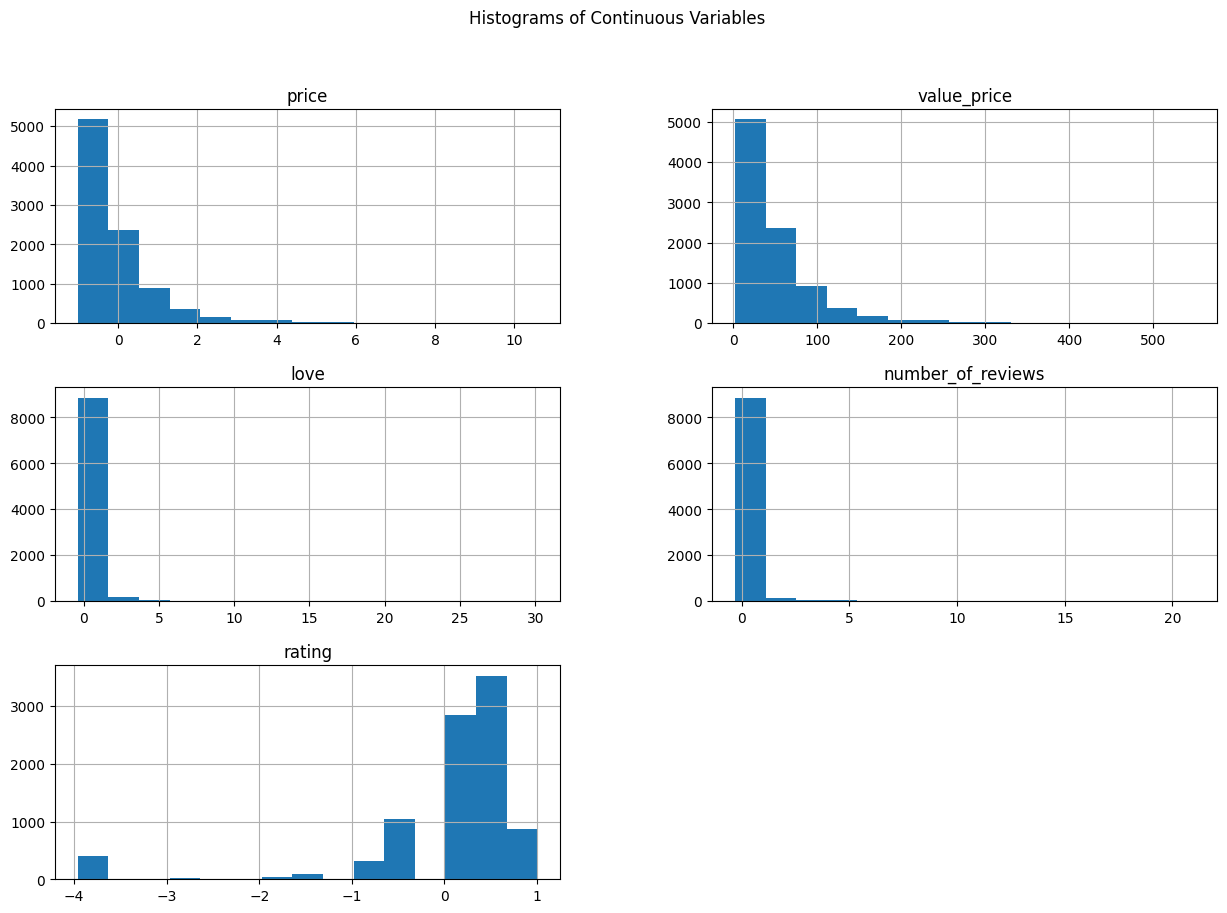

In [ ]:
# Histograms for continuous variables
numeric_columns = ['price', 'value_price', 'love', 'number_of_reviews', 'rating']
data[numeric_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Continuous Variables')
plt.show()

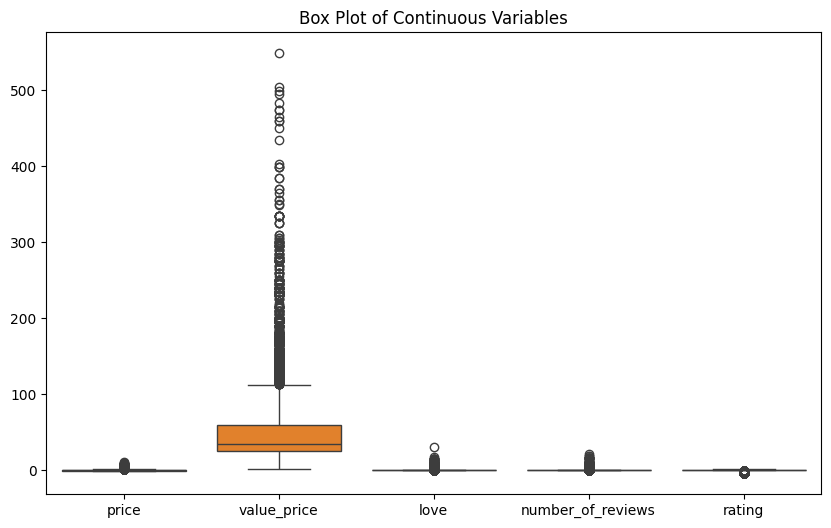

In [ ]:
# Box plots for detecting outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numeric_columns])
plt.title('Box Plot of Continuous Variables')
plt.show()


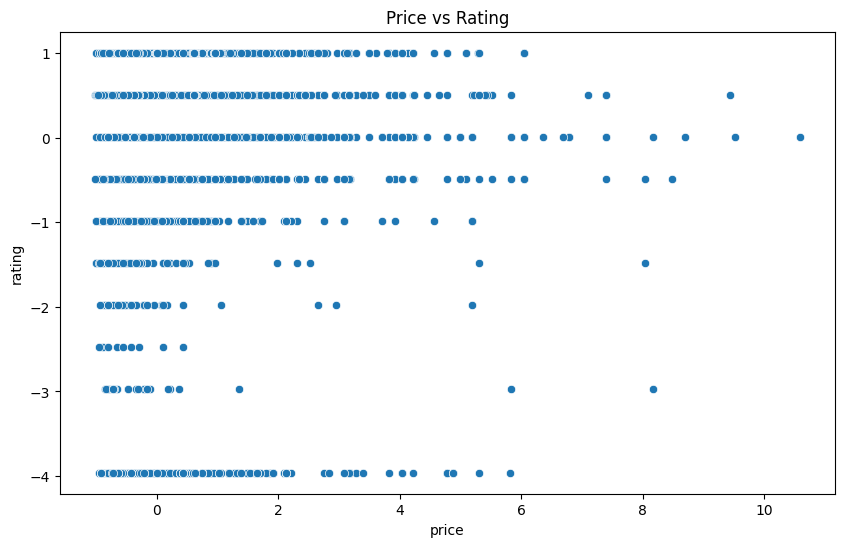

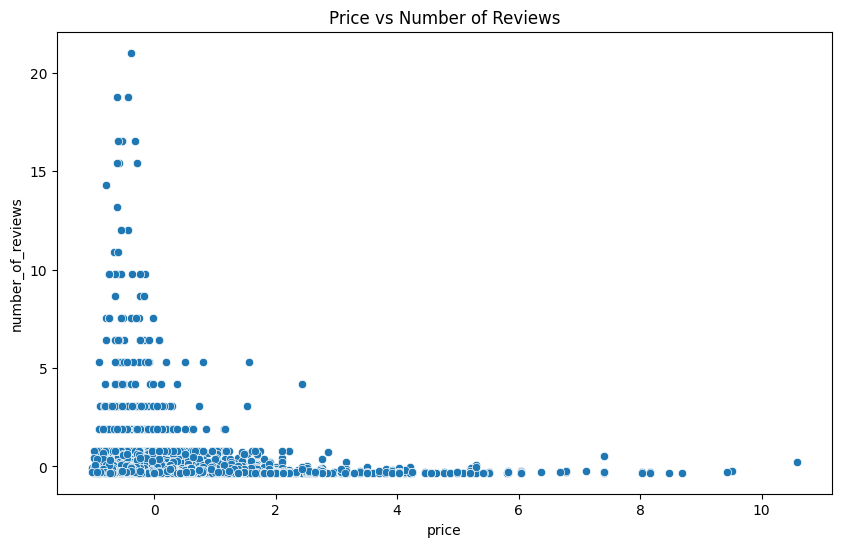

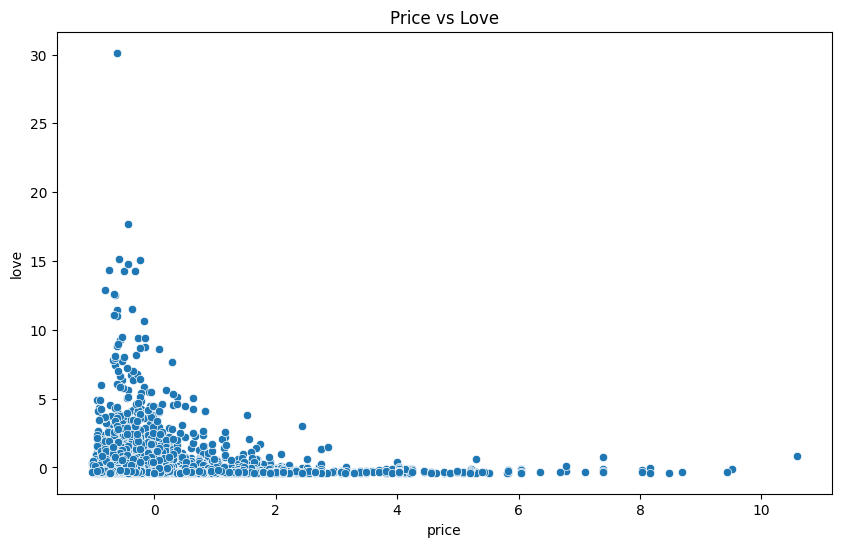

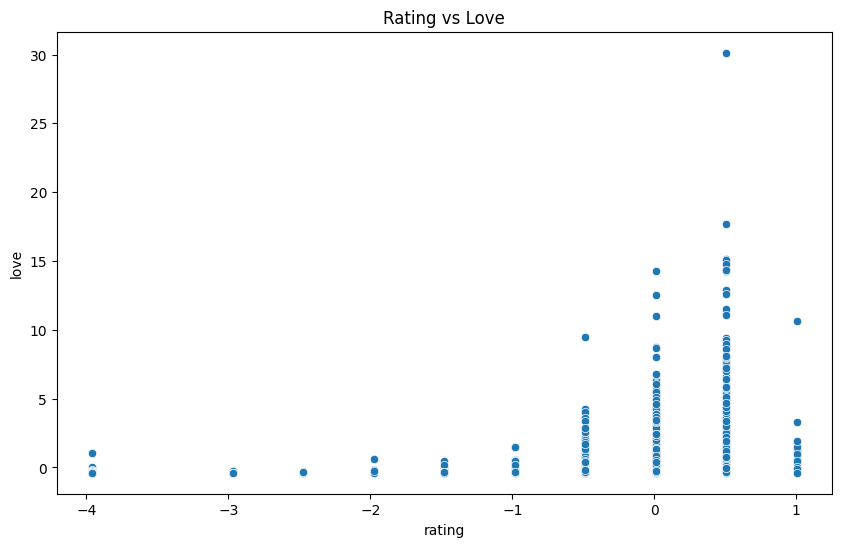

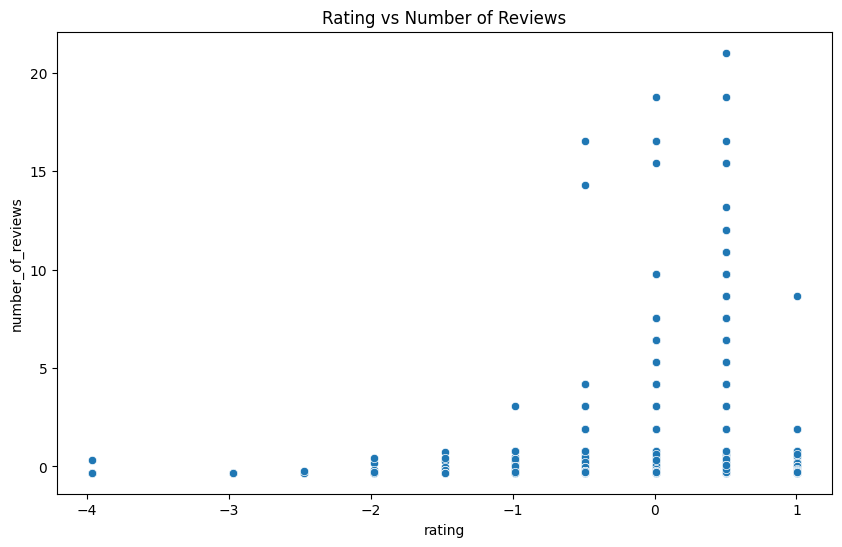

In [ ]:
# Scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='rating', data=data)
plt.title('Price vs Rating')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='number_of_reviews', data=data)
plt.title('Price vs Number of Reviews')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='love', data=data)
plt.title('Price vs Love')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='love', data=data)
plt.title('Rating vs Love')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='number_of_reviews', data=data)
plt.title('Rating vs Number of Reviews')
plt.show()

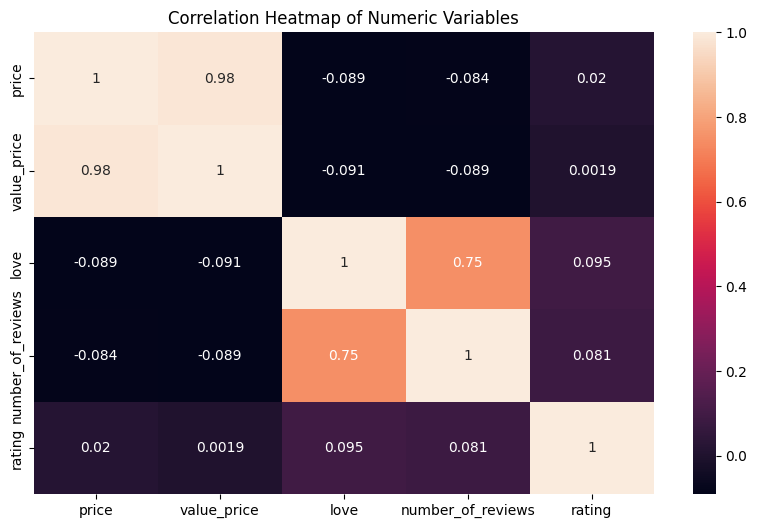

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data[numeric_columns].corr(), annot=True)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

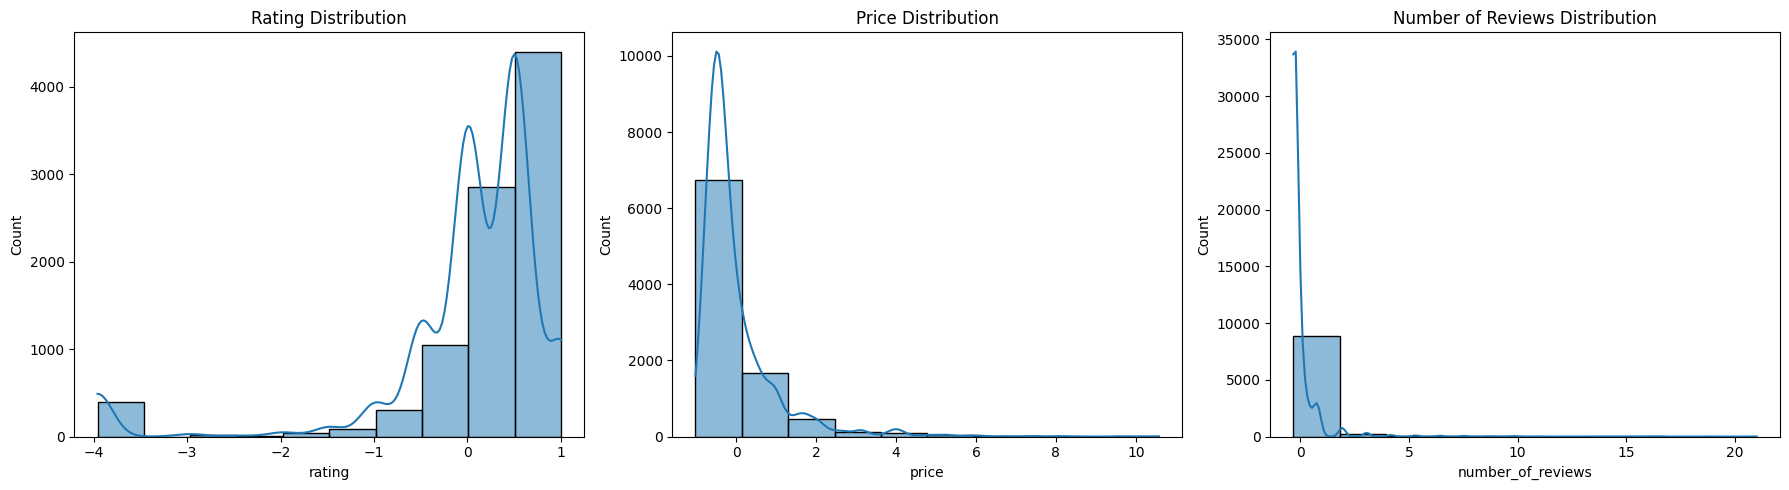

In [ ]:
# Distribution plots for key columns
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data['rating'], bins=10, kde=True, ax=axs[0]).set(title='Rating Distribution')
sns.histplot(data['price'], bins=10, kde=True, ax=axs[1]).set(title='Price Distribution')
sns.histplot(data['number_of_reviews'], bins=10, kde=True, ax=axs[2]).set(title='Number of Reviews Distribution')
plt.tight_layout()
plt.show()

### Categorical Data Analysis

Text(0.5, 1.0, 'Top 10 Category')

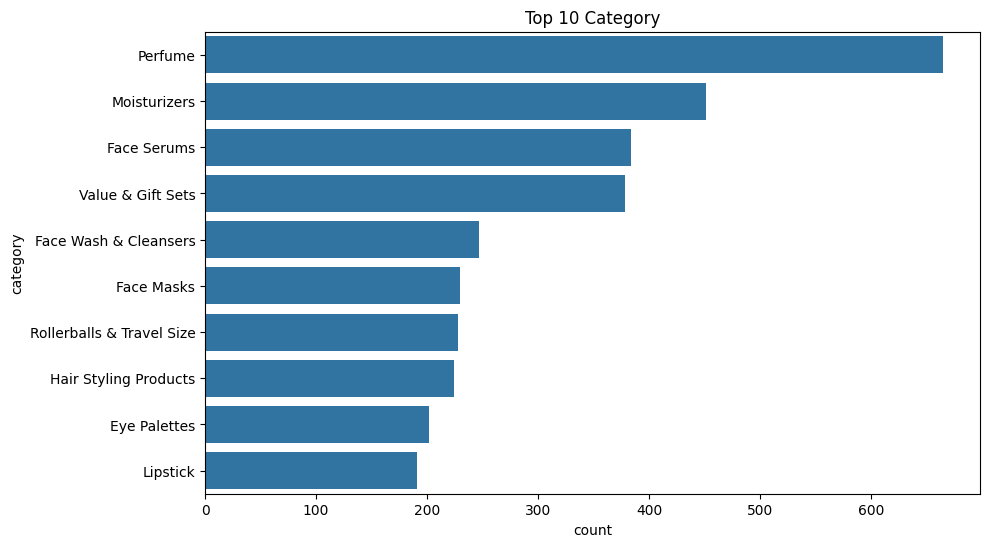

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=data, order=data['category'].value_counts().nlargest(10).index)
plt.title('Top 10 Category')

Text(0.5, 1.0, 'Top 10 Brands')

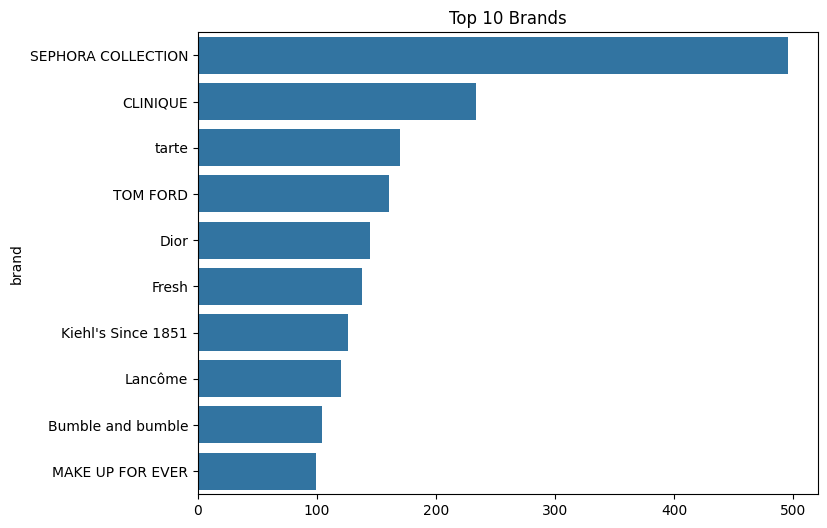

In [ ]:
top_brands = data['brand'].value_counts().nlargest(10)
plt.figure(figsize=(8, 6))
sns.barplot(y=top_brands.index, x=top_brands.values)
plt.title('Top 10 Brands')